# Data Exploration

We will explore the dataset by:

- Viewing summary statistics.
- Plotting distributions of key numerical variables (to observe skewness).
- Examining the distribution of imbalanced categorical variables.
- Visualizing the correlation matrix to identify highly correlated features

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df = pd.read_csv('merged_df.csv')
merged_df.head()


,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,id,type,sectionName,publicationDate,webTitle,webUrl,headline,body
0,0,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02,tv-and-radio/2024/jan/03/detroiters-sitcom-tim...,article,Television & radio,2024-01-02,"Before I Think You Should Leave, there was Det...",https://www.theguardian.com/tv-and-radio/2024/...,"Before I Think You Should Leave, there was Det...",<p>Pinning down why Tim Robinson is funny is v...
1,1,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02,environment/2024/jan/02/climate-crisis-2023-wa...,article,Environment,2024-01-02,Climate crisis: 2023 was UK’s second-hottest y...,https://www.theguardian.com/environment/2024/j...,Climate crisis: 2023 was UK’s second-hottest y...,<p>The UK had its second-hottest year on recor...
2,2,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02,business/2024/jan/02/uk-grocery-inflation-food...,article,Business,2024-01-02,UK shop inflation sticks at 4.3% despite lower...,https://www.theguardian.com/business/2024/jan/...,UK shop inflation sticks at 4.3% despite lower...,<p>Shop prices continued to rise at 4.3% in De...
3,3,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02,stage/2024/jan/02/oliver-emanuel-obituary,article,Stage,2024-01-02,Oliver Emanuel obituary,https://www.theguardian.com/stage/2024/jan/02/...,Oliver Emanuel obituary,"<p>Oliver Emanuel, who has died aged 43 from b..."
4,4,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02,business/live/2024/jan/02/aldi-lidl-enjoy-reco...,liveblog,Business,2024-01-02,Tesla overtaken by China’s BYD as world’s top-...,https://www.theguardian.com/business/live/2024...,Tesla overtaken by China’s BYD as world’s top-...,"<div id=""block-6594260e8f083d1e9a9aea1a"" class..."


## Summary Statistics

In [69]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1687 non-null   int64         
 1   Open             1687 non-null   float64       
 2   High             1687 non-null   float64       
 3   Low              1687 non-null   float64       
 4   Close            1687 non-null   float64       
 5   Volume           1687 non-null   int64         
 6   Dividends        1687 non-null   float64       
 7   Stock Splits     1687 non-null   float64       
 8   Date             1687 non-null   object        
 9   id               1687 non-null   object        
 10  type             1687 non-null   object        
 11  sectionName      1687 non-null   object        
 12  publicationDate  1687 non-null   datetime64[ns]
 13  webTitle         1687 non-null   object        
 14  webUrl           1687 non-null   object 

The dataset contains numeric columns, categorical, and text columns.
- The numeric columns are: 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', and 'Stock Splits'. 
- The categorical and text columns are: 'Date', 'id', 'type', 'sectionName', 'publicationDate'm 'webTitle', 'webUrl', 'headline', 'body'.

In [71]:
print(merged_df.describe())

        Unnamed: 0         Open         High          Low        Close  \
count  1687.000000  1687.000000  1687.000000  1687.000000  1687.000000   
mean    843.000000  5422.869845  5447.845476  5397.733925  5424.190361   
min       0.000000  4690.569824  4721.490234  4682.109863  4688.680176   
25%     421.500000  5132.379883  5165.620117  5106.145020  5127.790039   
50%     843.000000  5433.669922  5479.549805  5406.959961  5434.430176   
75%    1264.500000  5726.520020  5741.029785  5702.830078  5722.259766   
max    1686.000000  6089.029785  6099.970215  6079.979980  6090.270020   
std     487.139268   362.168117   363.197701   361.044143   361.883996   

             Volume  Dividends  Stock Splits                publicationDate  
count  1.687000e+03     1687.0        1687.0                           1687  
mean   3.954438e+09        0.0           0.0  2024-07-01 22:03:54.736218112  
min    1.757720e+09        0.0           0.0            2024-01-02 00:00:00  
25%    3.530380e+09  

Notably, the Dividends and Stock Splits columns are all 0.0. The Dividends column being 0.0 means that no dividends were issued during 2024. The Stock Splits column being 0.0 suggests that there were no stock splits among the S&P 500 index components during this period.

In [72]:
missing_values = merged_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0         0
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
Date               0
id                 0
type               0
sectionName        0
publicationDate    0
webTitle           0
webUrl             0
headline           0
body               0
dtype: int64


## Distributions of key numerical variables 

### Histogram for Price distribution

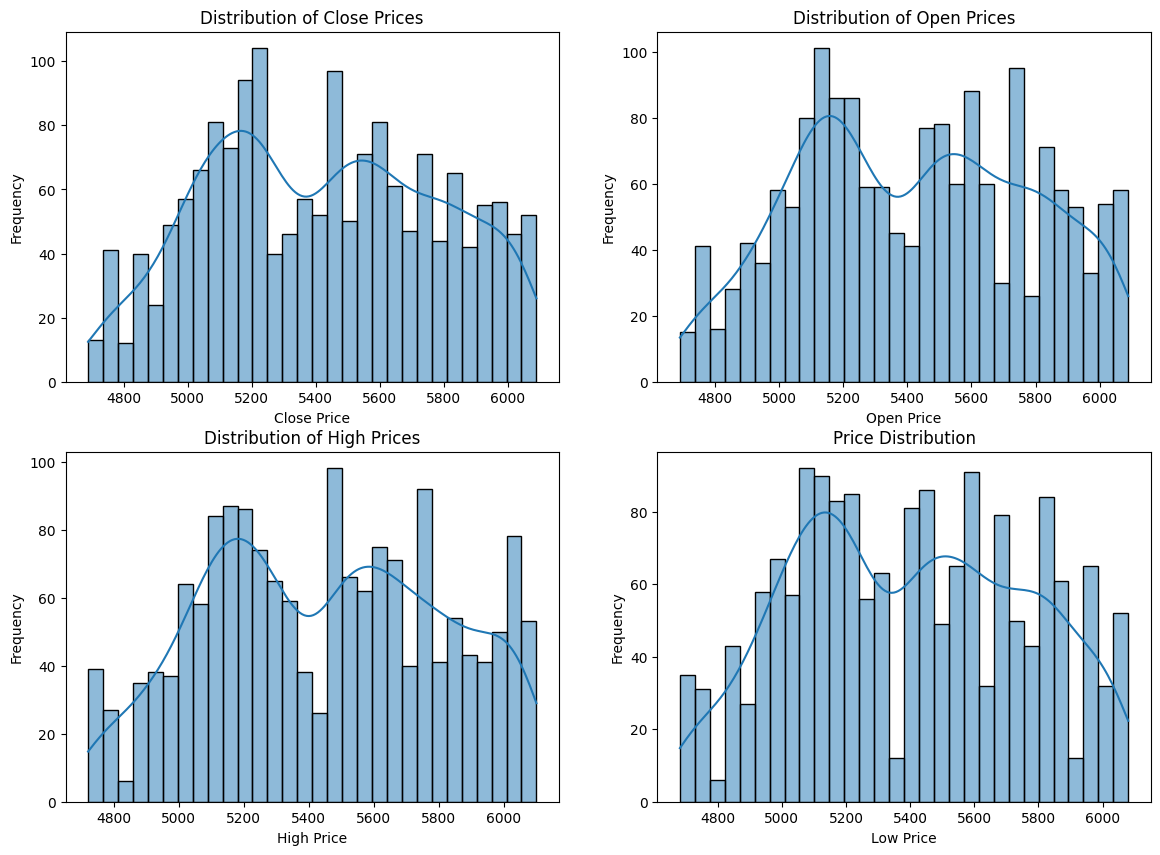

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(merged_df['Close'].dropna(), bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title('Distribution of Close Prices')
axes[0,0].set_xlabel('Close Price')
axes[0,0].set_ylabel('Frequency')

sns.histplot(merged_df['Open'].dropna(), bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_title('Distribution of Open Prices')
axes[0,1].set_xlabel('Open Price')
axes[0,1].set_ylabel('Frequency')

sns.histplot(merged_df['High'].dropna(), bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Distribution of High Prices')
axes[1,0].set_xlabel('High Price')
axes[1,0].set_ylabel('Frequency')

sns.histplot(merged_df['Low'].dropna(), bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title('Distribution of Low Prices')
axes[1,1].set_xlabel('Low Price')
axes[1,1].set_ylabel('Frequency')

plt.show()


All four distributions closely resemble each other, which is expected since Open, High, Low, and Close prices are highly correlated in stock market data

Each histogram reveals a bimodal distribution, characterized by two prominent peaks. This suggests that the market frequently oscillated between two distinct price levels. This is likely influenced by macroeconomic shifts or changes in investor sentiment.

The broad spread of the histogram from around 4700 - 6100 suggests high market volatility, as prices fluctuated rather than clustering around a single value.

The highest frequency of prices is generally observed around 5000-5200 and 5400-5600, indicating that these were stable price zones where the market spent significant time. 

### Distribution of Volume

Text(0, 0.5, 'Frequency')

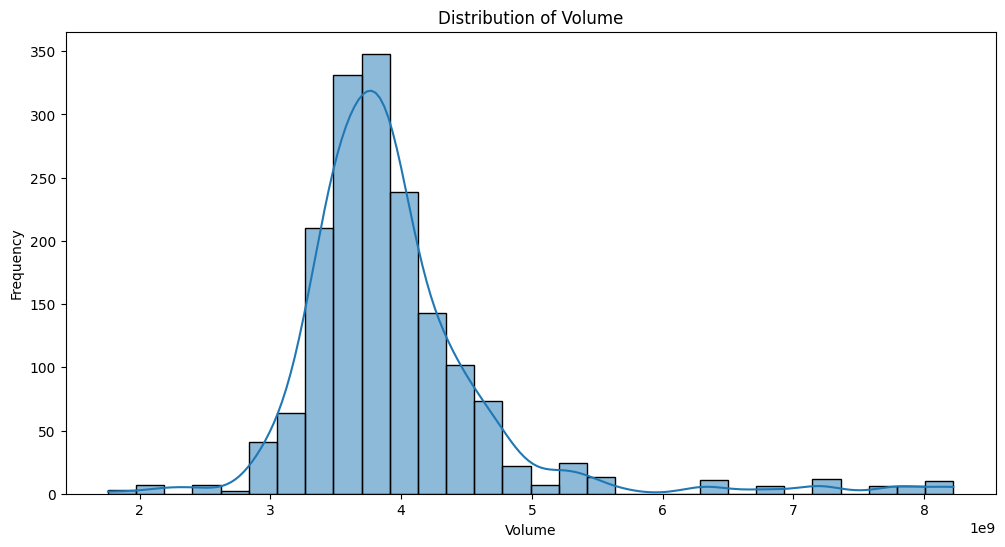

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Volume'].dropna(), bins=30, kde=True)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')


The distribution appears approximately normal, centered around 3.5 to 4 billion shares traded per day. However, there is a right skew, indicating that on some days, significantly higher trading volumes occurred. This suggests that most days have moderate trading activity, but occasionally, the market experiences a spike in trading volume.

### Line plot of S&P 500 prices over time

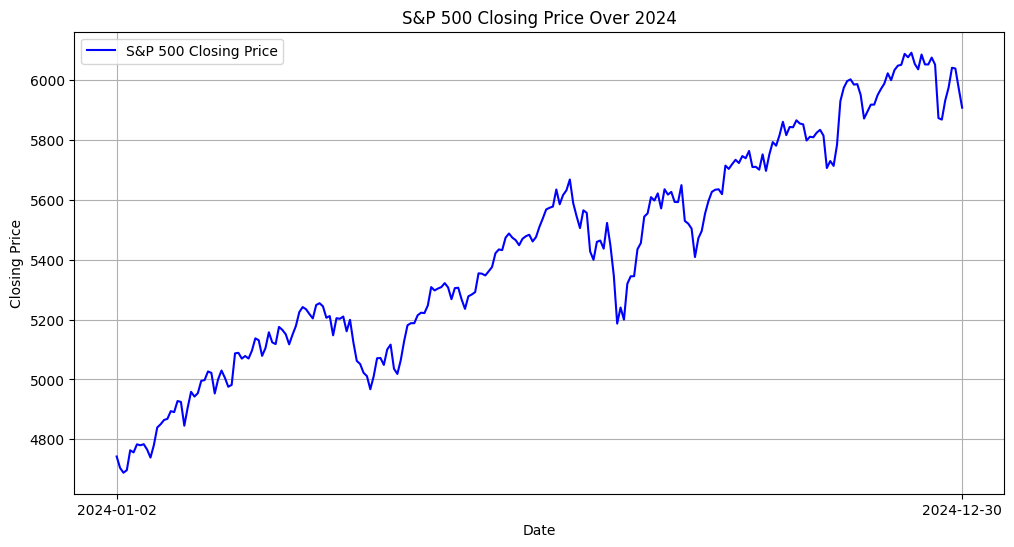

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Date"], merged_df["Close"], label="S&P 500 Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("S&P 500 Closing Price Over 2024")
plt.legend()
plt.xticks([merged_df["Date"].iloc[0], merged_df["Date"].iloc[-1]])

plt.grid()
plt.show()

The S&P 500 index has been steadily increasing over time in 2024, showing a general upward trend.
This suggests a optimistic market trend, likely driven by positive economic indicators, corporate earnings, or investor sentiment.

### Count of news articles over time

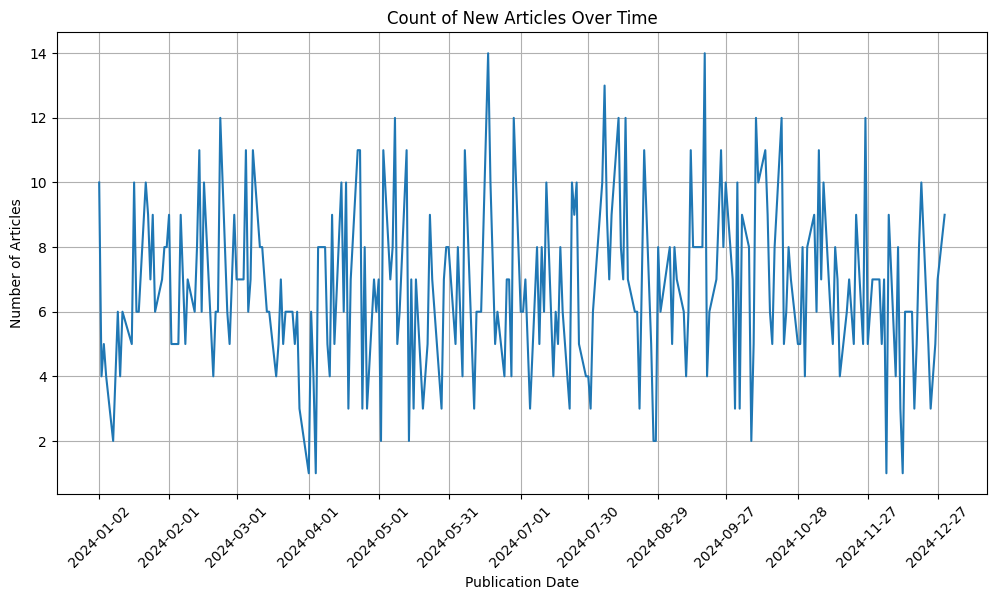

In [75]:
merged_df['publicationDate'] = pd.to_datetime(merged_df['publicationDate'])
article_counts = merged_df['publicationDate'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(article_counts.index, article_counts.values)
plt.title('Count of New Articles Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')

start_date = article_counts.index.min()
end_date = article_counts.index.max()
tick_dates = pd.date_range(start=start_date, end=end_date, freq='30D')
tick_positions = [article_counts.index.get_indexer([date], method="nearest")[0] for date in tick_dates]

plt.xticks(article_counts.index[tick_positions], 
           article_counts.index[tick_positions].strftime("%Y-%m-%d"), 
           rotation=45)
plt.grid()
plt.show()


The bar chart illustrates the number of S&P 500-related news articles published in 2024. We labeled the dates very 30 days to make it easier to read.

The daily count varies significantly: some days have over 12 articles, while others have fewer. The maximum count of articles is around 14, while the minimum is only 1.

The distribution is highly volatile, with frequent fluctuations in the number of articles published per day. The highest spikes occur a few times throughout the year, while there are also occasional dips where the number of published articles is very low, suggesting possible market quiet periods or days with less financial news activity.

The frequency of articles does not appear to have a strong upward or downward trend, indicating that news coverage remained relatively consistent throughout the year.


### Correlation heatmap for numerical columns

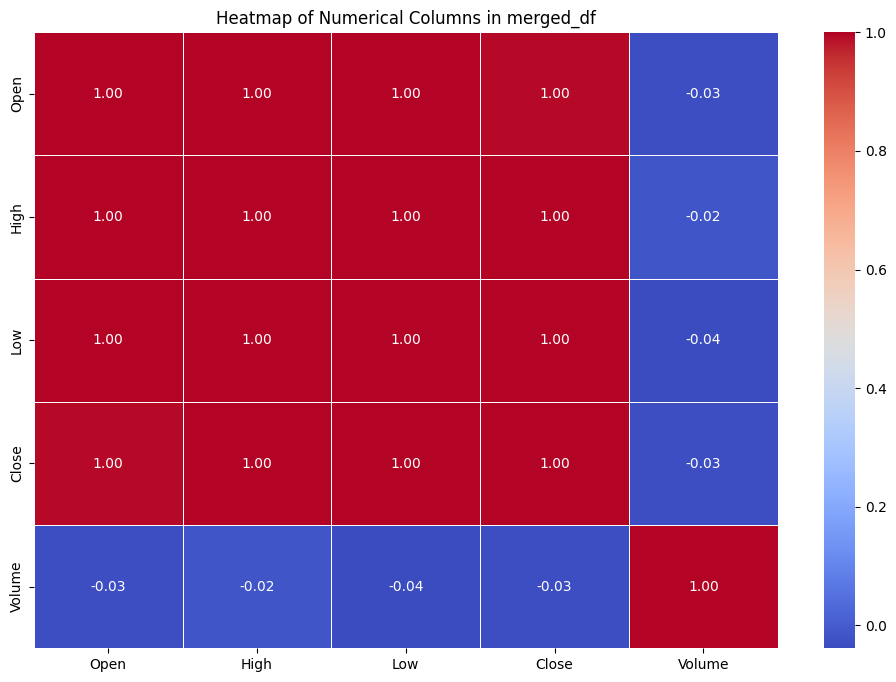

In [76]:
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
correlation_matrix = merged_df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Columns in merged_df")
plt.show()

The heatmap shows that Open, High, Low, and Close prices are perfectly correlated (1.00). When one factor changes, the others change proportionally. This is expected since stock prices throughout the trading day are highly interdependent.

The correlation values between Volume and all price-related features (Open, High, Low, Close) range from -0.02 to -0.04. This indicates a very weak negative correlation between trading volume and price movements. We can infer that changes in trading volume have little to no impact on stock prices.